In [4]:
import pandas as pd
import seaborn as sns 


In [2]:
df=pd.read_csv("episodes.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        36 non-null     int64  
 1   url       36 non-null     object 
 2   name      36 non-null     object 
 3   season    36 non-null     int64  
 4   number    36 non-null     int64  
 5   type      36 non-null     object 
 6   airdate   36 non-null     object 
 7   airtime   36 non-null     object 
 8   runtime   36 non-null     int64  
 9   rating    36 non-null     float64
 10  summary   36 non-null     object 
 11  medium    36 non-null     object 
 12  original  36 non-null     object 
dtypes: float64(1), int64(4), object(8)
memory usage: 3.8+ KB


<AxesSubplot:>

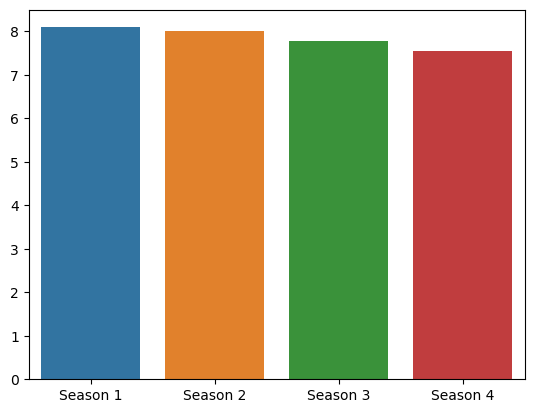

In [8]:
s1 = df[df['season'] == 1]
s2 = df[df['season'] == 2]
s3 = df[df['season'] == 3]
s4 = df[df['season'] == 4]
s1_ratings = sum(s1['rating'])/len(s1)
s2_ratings = sum(s2['rating'])/len(s2)
s3_ratings = sum(s3['rating'])/len(s3)
s4_ratings = sum(s4['rating'])/len(s4)
season_rating = [s1_ratings, s2_ratings, s3_ratings, s4_ratings]
season_name = [ 'Season 1', 'Season 2', 'Season 3', 'Season 4']
sns.barplot(data = df, x=season_name, y=season_rating, )

In [9]:
df[df['rating'] > 8][['name', 'rating']]

,name,rating
6,Trompe L'Oeil,8.6
8,The Well-Tempered Clavier,8.5
9,The Bicameral Mind,8.7
17,Kiksuya,8.7
18,Vanishing Point,8.4
19,The Passenger,8.5


In [10]:
df['airdate'] = pd.to_datetime(df['airdate'])

In [12]:
df_befordate = df[df['airdate'] <= '2019-05']

In [13]:
df_befordate[['name','airdate']]

,name,airdate
0,The Original,2016-10-02
1,Chestnut,2016-10-09
2,The Stray,2016-10-16
3,Dissonance Theory,2016-10-23
4,Contrapasso,2016-10-30
5,The Adversary,2016-11-06
6,Trompe L'Oeil,2016-11-13
7,Trace Decay,2016-11-20
8,The Well-Tempered Clavier,2016-11-27
9,The Bicameral Mind,2016-12-04


In [27]:
minrating = df.groupby('season')['rating'].min()
maxrating= df.groupby('season')['rating'].max()
def ratingfun(l1):
    for season, rating in l1.items():
        print(season, rating)
        episodes = list(df[(df['season'] == int(season)) & (df['rating'] == rating)]['name'])
        print(f"Episodes for season {season}: ", episodes)
        

In [29]:
ratingfun(minrating)

1 7.6
Episodes for season 1:  ['The Stray']
2 7.6
Episodes for season 2:  ['Akane No Mai']
3 7.5
Episodes for season 3:  ['Decoherence', 'Passed Pawn']
4 7.1
Episodes for season 4:  ['The Auguries']


In [30]:
ratingfun(maxrating)

1 8.7
Episodes for season 1:  ['The Bicameral Mind']
2 8.7
Episodes for season 2:  ['Kiksuya']
3 8.0
Episodes for season 3:  ['Parce Domine', 'The Mother of Exiles']
4 7.8
Episodes for season 4:  ['Zhuangzi']


In [17]:
hrper_season = df.groupby('season')['rating'].max()
episodes_with_high_rat_for_season = []
def summary_of_high_rating(high_rating_per_season):
    for season, rating in high_rating_per_season.items():
        # print(season, rating)
        episodes = list(df[(df['season'] == int(season)) & (df['rating'] == rating)]['name'])
        for i in episodes:
            print(f"Season: {season}, Highest rating: {rating}")
            print(f'{i}:')
            print( df[df['name'] == i]['summary'])

summary_of_high_rating(hrper_season)


Season: 1, Highest rating: 8.7
The Bicameral Mind:
9    Delores finds out the truth about William's fa...
Name: summary, dtype: object
Season: 2, Highest rating: 8.7
Kiksuya:
17    Another of Westworld's Host revolutionaries is...
Name: summary, dtype: object
Season: 3, Highest rating: 8.0
Parce Domine:
20    If you're stuck in a loop, try walking in a st...
Name: summary, dtype: object
Season: 3, Highest rating: 8.0
The Mother of Exiles:
23    The truth doesn't always set you free.
Name: summary, dtype: object
Season: 4, Highest rating: 7.8
Zhuangzi:
32    God is bored.
Name: summary, dtype: object
